## Intro to Inferential Statistics Final Project -- Haberman’s Survival Data

### __Introduction__

This project is the final project for Udacity course [Intro to Inferential Statistics](https://classroom.udacity.com/courses/ud201). 

The Haberman’s Survival data set gives 306 patients who had been diagnosed with breast cancer from 1958-1969. The data includes the age of the patient at time of operation, the year that they received the operation, the number of axil_nodes they were detected and the survival status after the operation. The goal of this analysis is to find out if there is a significant difference between those who survived longer or shorter than 5 years.  

The attribute information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Let's read the data and store them in a dataframe called _data_.

In [16]:
import pandas as pd
import math
file_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
data = pd.read_csv(file_path, header=None,delimiter=",", names=(['Patient age','Year of operation','Number of axillary nodes','Survival status']))
data

,Patient age,Year of operation,Number of axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### __Research Questions and Hypothesis__

There are four columns in Haberman's survival data. The first three columns, i.e. patient age, year of operation and number of axillary nodes are independent variables. The dependent variable is survival status. Among all the 306 patients, some survived more than 5 years. Did their age, year of operation or number of axillary nodes have significant differences from those who didn't survive longer? Do all three independent variables affect survival status?

In this project, we are going to analyze the correlation between the age and the axil_nodes detected, the age and survival year and the operation year. To simplify the labels, we define the patients who survived 5 years or longer as group 1 and those who died within 5 years as group 2.

The hypothesis would be described as follows. The null hypothesis would be the survival status happened by chance, i.e. age of patient at time of operation, year of operation year and axil_nodes for different survival status are equal. 
H0 :   age1 = age2, op_year1 = op_year2, nodes1= nodes2
HA:   age1 ≠ age2, op_year1 ≠ op_year2, nodes1 ≠ nodes2

Let's check if there was any missing data, then split the data into two groups.

In [17]:
data.isnull().sum()

Patient age                 0
Year of operation           0
Number of axillary nodes    0
Survival status             0
dtype: int64

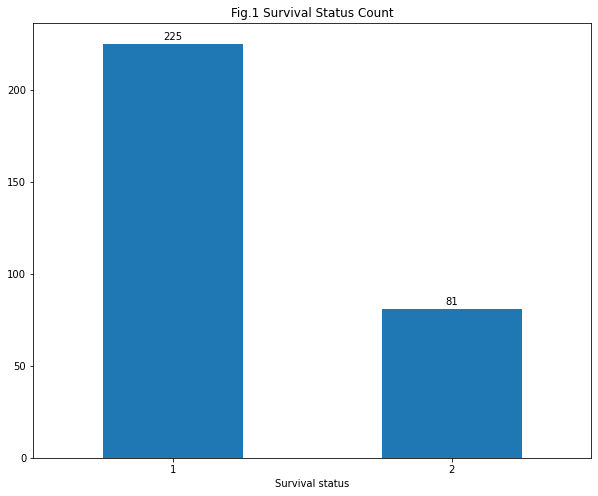

In [18]:
import matplotlib.pyplot as plt



# Bar chart showing average arrival delay for Spirit Airlines flights by month
ax = data.groupby('Survival status')['Patient age'].count().plot(kind='bar',figsize=(10,8))
plt.title("Fig.1 Survival Status Count")

# Add label for vertical axis
plt.xticks(rotation=360)

for i in range(data['Survival status'].unique()[1]):
    ax.annotate(data[data['Survival status'] == i+1].shape[0],  
                    xy = (1*i, data[data['Survival status'] == i+1].shape[0]+2),                    
                    rotation= 0,                    
                    ha='center'              
               )

group1 = data[data['Survival status'] == 1]
group2 = data[data['Survival status'] == 2]


There were 225 patients in group 1 and 81 patients in group 2.

### __Experimental Design__

Based on the hypothesis, we are going to use two tailed t-test for our hypothesis. Since the sample sizes are not nearly equal, we will use pooled variance to do the calculation.

In [19]:
# Degree of Freedom for group 1
n1= group1.shape[0]-1
df1=n1-1
# Degree of Freedom for goup 2
n2= group2.shape[0]-1
df2=n2-1

print('The degree of freedom for group1 is {}, the degree of freedom for group2 is {}'.format(df1,df2))

The degree of freedom for group1 is 223, the degree of freedom for group2 is 79


In [20]:
# Calculate mean age, mean operation year and mean number of axillary nodes for each group
mean_age1=group1['Patient age'].mean()
mean_age2=group2['Patient age'].mean()
mean_op_year1=group1['Year of operation'].mean()
mean_op_year2=group2['Year of operation'].mean()
mean_nodes1=group1['Number of axillary nodes'].mean()
mean_nodes2=group2['Number of axillary nodes'].mean()
print('The mean age for group1 is {}, the mean age for group2 is {}'.format(mean_age1,mean_age2))
print('The mean of operation year for group1 is {}, the mean of operation year for group2 is {}'.format(mean_op_year1,mean_op_year2))
print('The mean number for axillary nodes of group1 is {}, the mean number for axillary nodes of group2 is {}'.format(mean_nodes1,mean_nodes2))

The mean age for group1 is 52.01777777777778, the mean age for group2 is 53.67901234567901
The mean of operation year for group1 is 62.86222222222222, the mean of operation year for group2 is 62.82716049382716
The mean number for axillary nodes of group1 is 2.7911111111111113, the mean number for axillary nodes of group2 is 7.45679012345679


In [21]:
# Calculate the sum of squares

# Sum of squares for age
SS_age1 = sum((i-mean_age1)*(i-mean_age1) for i in group1['Patient age'])
SS_age2 = sum((i-mean_age2)*(i-mean_age2) for i in group2['Patient age'])

#Sum of squares for nodes
SS_op_year1 = sum((i-mean_op_year1)*(i-mean_op_year1) for i in group1['Year of operation'])
SS_op_year2 = sum((i-mean_op_year2)*(i-mean_op_year2) for i in group2['Year of operation'])

#Sum of squares for number of nodes
SS_nodes1 = sum((i-mean_nodes1)*(i-mean_nodes1) for i in group1['Number of axillary nodes'])
SS_nodes2 = sum((i-mean_nodes2)*(i-mean_nodes2) for i in group2['Number of axillary nodes'])

In [22]:
# Calculate pooled varience

pooled_variance_age = (SS_age1+SS_age2)/(df1+df2)
pooled_variance_op_year = (SS_op_year1+SS_op_year2)/(df1+df2)
pooled_variance_nodes = (SS_nodes1+SS_nodes2)/(df1+df2)


In [23]:
# Calculate corrected standard error of the mean
SE_age = math.sqrt(pooled_variance_age/n1+pooled_variance_age/n2)

SE_op_year = math.sqrt(pooled_variance_op_year/n1+pooled_variance_op_year/n2)

SE_nodes = math.sqrt(pooled_variance_nodes/n1+pooled_variance_nodes/n2)

print('The corrected standard error for age is {}'.format(SE_age))
print('The corrected standard error for operation year is {}'.format(SE_op_year))
print('The corrected standard error for the number of axillary nodes is {}'.format(SE_nodes))

The corrected standard error for age is 1.410820799859231
The corrected standard error for operation year is 0.4253173504217685
The corrected standard error for the number of axillary nodes is 0.9015457967799282


In [24]:
# Calculate t statistics

t_age = (mean_age1-mean_age2)/SE_age
t_op_year = (mean_op_year1-mean_op_year2)/SE_op_year
t_nodes = (mean_nodes1-mean_nodes2)/SE_nodes

print('The t statistic for age is {}'.format(t_age))
print('The t statistic for operation year is {}'.format(t_op_year))
print('The t statistic for number of axillary nodes is {}'.format(t_nodes))

The t statistic for age is -1.1774950922661382
The t statistic for operation year is 0.08243662846177068
The t statistic for number of axillary nodes is -5.175199118015072


In [25]:
# Calculate total degree of freedom
df = df1+df2 
df

302

By using the online [Statistical Ratio Calculator](https://www.graphpad.com/quickcalcs/statratio1/), we know that at alpha=0.05, df = 304, the two_tailed t_critical value is 1.9678. The t statistic values for age and operation year are smaller than t_critical value, so we'll have to retain the null for those two factors. But the t statistic for the number of axillary nodes is larger than t_critical value, we will reject the null. There is significant difference between the number of axillary nodes for the two groups.

In [26]:
t_critical = 1.9678
# Calculate margin of error
Margin_age = t_critical*SE_age
Margin_op_year = t_critical*SE_op_year
Margin_nodes = t_critical*SE_nodes

print('The margin of error for age is {}'.format(Margin_age))
print('The margin of error for operation is {}'.format(Margin_op_year))
print('The margin of error for nodes is {}'.format(Margin_nodes))


The margin of error for age is 2.7762131699629946
The margin of error for operation is 0.8369394821599561
The margin of error for nodes is 1.7740618189035426


In [27]:
# Calculate confidence interval
CI_age_low=(mean_age1-mean_age2-Margin_age)
CI_age_high = (mean_age1-mean_age2+Margin_age)
print('The confidence interval for age is ({},{})'.format(CI_age_low,CI_age_high))

CI_op_year_low=(mean_op_year1-mean_op_year2-Margin_op_year)
CI_op_year_high = (mean_op_year1-mean_op_year2+Margin_op_year)
print('The confidence interval for operation year is ({},{})'.format(CI_op_year_low,CI_op_year_high))

CI_nodes_low=(mean_nodes1-mean_nodes2-Margin_nodes)
CI_nodes_high = (mean_nodes1-mean_nodes2+Margin_nodes)
print('The confidence interval for nodes is ({},{})'.format(CI_nodes_low,CI_nodes_high))

The confidence interval for age is (-4.437447737864227,1.1149786020617625)
The confidence interval for operation year is (-0.801877753764892,0.8720012105550201)
The confidence interval for nodes is (-6.439740831249222,-2.891617193442136)


If a 95% confidence interval includes the null value, then there is no statistically meaningful or statistically significant difference between the groups. We see that the confidence intervals for age and operation year include zero, meaning those two factors are not statistically significant. The number of axillary nodes is statistically significant because its confidence interval does not include zero.

 Python also provides built-in function called ttest_ind to calculate the t statistic values. Let's run the ttest_ind to verify the results.

In [28]:
import scipy.stats 
scipy.stats.ttest_ind(group1['Patient age'], group2['Patient age'])

Ttest_indResult(statistic=-1.1874990487687174, pvalue=0.23595785126829644)

In [29]:
scipy.stats.ttest_ind(group1['Year of operation'], group2['Year of operation'])

Ttest_indResult(statistic=0.08313700713066488, pvalue=0.9337973158604566)

In [30]:
scipy.stats.ttest_ind(group1['Number of axillary nodes'], group2['Number of axillary nodes'])

Ttest_indResult(statistic=-5.219167426001108, pvalue=3.335385116660208e-07)

Python function gives the same results.The p value for the number of axillary nodes is very small.

### Conclusion

There is no significant age difference or year of operation difference between the two groups. The main factor that affects the survival status is the number axillary nodes. People who did not survive more than 5 years have more axillary nodes than those who survived more than 5 years.  